# **Tugas Praktikum**

## **Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.**

### **1. Import Library**

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### **2. Load CIFAR-10 dataset**

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

### **3. Normalisasikan nilai piksel menjadi antara 0 dan 1**

In [4]:
train_images, test_images = train_images / 255.0, test_images / 255.0

### **4. Buat model CNN**

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.35))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        3136      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        65600     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                        

### **7. Compile modelnya**

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### **8. Latih model dengan lebih banyak epoch**

In [7]:
history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 52s 29ms/step - loss: 1.5785 - accuracy: 0.4627 - val_loss: 1.3308 - val_accuracy: 0.5300
Epoch 2/20
1563/1563 [==============================] - 45s 29ms/step - loss: 0.9503 - accuracy: 0.6659 - val_loss: 0.9344 - val_accuracy: 0.6735
Epoch 3/20
1563/1563 [==============================] - 45s 29ms/step - loss: 0.7622 - accuracy: 0.7379 - val_loss: 0.7157 - val_accuracy: 0.7555
Epoch 4/20
1563/1563 [==============================] - 45s 29ms/step - loss: 0.6567 - accuracy: 0.7749 - val_loss: 0.6672 - val_accuracy: 0.7727
Epoch 5/20
1563/1563 [==============================] - 45s 29ms/step - loss: 0.5632 - accuracy: 0.8088 - val_loss: 0.5599 - val_accuracy: 0.8097
Epoch 6/20
1563/1563 [==============================] - 46s 29ms/step - loss: 0.4900 - accuracy: 0.8342 - val_loss: 0.5316 - val_accuracy: 0.8207
Epoch 7/20
1563/1563 [==============================] - 46s 29ms/step - loss: 0.4292 - accuracy: 0.8546 - val_loss: 0.5279 -

### **9. Evaluasi hasil model**

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 3s - loss: 0.5515 - accuracy: 0.8552 - 3s/epoch - 9ms/step
Test accuracy: 0.8551999926567078


### **10. Plot training history**

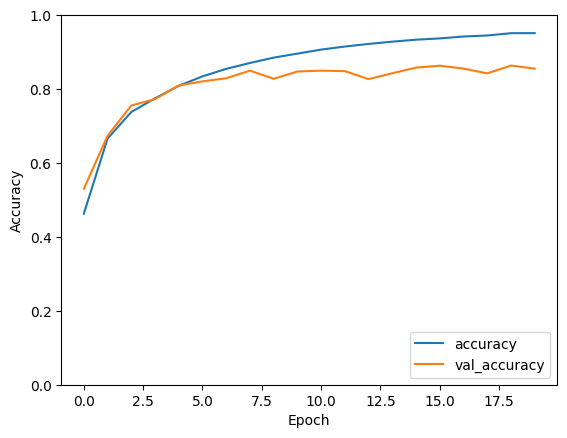

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()



## **Model CNN untuk klasifikasi dataset MNIST.**

### **1. Import Library**

In [10]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### **2. Load Mnist dataset**

In [11]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

### **3. Normalisasikan nilai piksel menjadi antara 0 dan 1**

In [12]:
train_images, test_images = train_images / 255.0, test_images / 255.0

### **4. Buat model CNN**

In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

### **5. Compile modelnya**

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### **6. Latih model dengan lebih banyak epoch**

In [15]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1476 - accuracy: 0.9540 - val_loss: 0.0496 - val_accuracy: 0.9834
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0484 - accuracy: 0.9854 - val_loss: 0.0329 - val_accuracy: 0.9887
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0339 - accuracy: 0.9891 - val_loss: 0.0338 - val_accuracy: 0.9896
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0254 - accuracy: 0.9920 - val_loss: 0.0322 - val_accuracy: 0.9905
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0209 - accuracy: 0.9936 - val_loss: 0.0291 - val_accuracy: 0.9915
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0168 - accuracy: 0.9946 - val_loss: 0.0279 - val_accuracy: 0.9919
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0136 - accuracy: 0.9958 - val_loss: 0.0271 - val_accuracy

### **7. Evaluasi hasil model**

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 1s - loss: 0.0408 - accuracy: 0.9913 - 700ms/epoch - 2ms/step
Test accuracy: 0.9912999868392944


### **8. Plot training history**

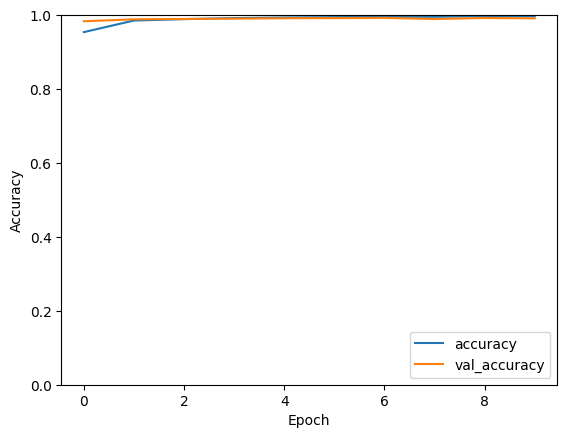

In [17]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()